In [318]:
from Beamformer_MVDR import beamformer_MVDR_FarField
import utils
# from acoular import MicGeom
import numpy as np
from scipy.io import wavfile
import os


MIC_ANGLE_VECTOR = np.arange(0,360,30)
LOOK_DIRECTION = 60
MIC_DIAMETER = 0.1
SAMPLING_RATE = 16000
FFT_LENGTH = 2048
FFT_SHIFT = 1024
SOUND_SPEED = 343

In [319]:
# get a, and s, then x
SIG_FREQ = 8000
SIG_DIRECTION = 300

a_sig = np.exp(( - 1j) * ((2 * np.pi * SIG_FREQ) / SOUND_SPEED) \
                             * (MIC_DIAMETER / 2) \
                             * np.cos(np.deg2rad(SIG_DIRECTION) - np.deg2rad(MIC_ANGLE_VECTOR)))

Rx = np.mat(1000 * np.dot(a_sig, np.transpose(np.conj(a_sig))) + 1 * np.eye(len(MIC_ANGLE_VECTOR))) # CSM

In [320]:
# searching_angle_rad = np.deg2rad(np.arange(0, 360, 1).reshape([1, -1])) # every angle for filter curve
# mvdr_beamformer = beamformer_MVDR_FarField(MIC_ANGLE_VECTOR,
#                                            MIC_DIAMETER,
#                                            sampling_frequency=SAMPLING_RATE,
#                                            fft_length=FFT_LENGTH,
#                                            fft_shift=FFT_SHIFT)
# steering_vector = np.mat(mvdr_beamformer.get_single_steering_vector(LOOK_DIRECTION, SIG_FREQ))
# w = Rx.I * steering_vector / (steering_vector.H * Rx.I * steering_vector)
# B = mvdr_beamformer.get_single_filter(searching_angle_rad, w, SIG_FREQ)

In [321]:
theta = np.deg2rad(np.arange(0, 360, 0.1).reshape([1, -1])) # every angle for filter curve
theta_0 = np.deg2rad(LOOK_DIRECTION)
MIC_ANGLE_VECTOR = MIC_ANGLE_VECTOR.reshape([-1,1])

a = np.mat(np.exp(( - 1j) * ((2 * np.pi * SIG_FREQ) / SOUND_SPEED) \
                      * (MIC_DIAMETER / 2) \
                      * np.cos(np.deg2rad(theta) - np.deg2rad(MIC_ANGLE_VECTOR))))
a_theta_0 = np.mat(np.exp(( - 1j) * ((2 * np.pi * SIG_FREQ) / SOUND_SPEED) \
                      * (MIC_DIAMETER / 2) \
                      * np.cos(np.deg2rad(theta_0) - np.deg2rad(MIC_ANGLE_VECTOR)))) # my fucking steering vector
w = Rx.I * a_theta_0 / (a_theta_0.H * Rx.I * a_theta_0) # Rx.I is the inverse of itself. BTW, w is the weighting vector, the transfer function, the beamformer!
B = w.H * a
B = np.abs(B) / np.max(np.abs(B)) # normalization

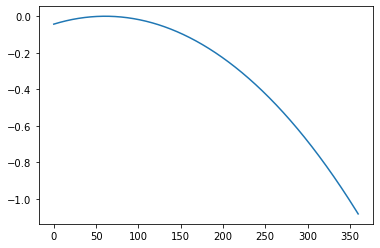

In [322]:
import matplotlib.pyplot as plt

# Define Data

x=np.arange(0, 360, 0.1).reshape([-1])
y = []
for ele in np.arange(B.shape[1]):
    y.append(B[0,ele])
# Plot

plt.plot(x, 20 * np.log10(y))

# Display

plt.show()

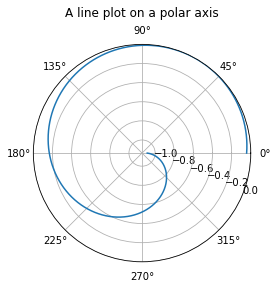

In [323]:
import numpy as np
import matplotlib.pyplot as plt


x=theta.reshape([-1])
y = []
for ele in np.arange(B.shape[1]):
    y.append(B[0,ele])

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(x, 20 * np.log10(y))
ax.set_rmax(max(20 * np.log10(y)))
# ax.set_rticks([0.25, 0.5, 0.75, 1])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

In [324]:
# multi_signal = multi_channel_read()
# complex_spectrum = utils.get_spectrogram(multi_signal, FFT_LENGTH, FFT_SHIFT, FFT_LENGTH)
# mvdr_beamformer = beamformer_MVDR_FarField(MIC_ANGLE_VECTOR,
#                                            MIC_DIAMETER,
#                                            sampling_frequency=SAMPLING_RATE,
#                                            fft_length=FFT_LENGTH,
#                                            fft_shift=FFT_SHIFT)
# steering_vector = mvdr_beamformer.get_sterring_vector(LOOK_DIRECTION)
# spatial_correlation_matrix = mvdr_beamformer.get_spatial_correlation_matrix(multi_signal)
# beamformer = mvdr_beamformer.get_mvdr_beamformer(steering_vector, spatial_correlation_matrix)
# enhanced_spectrum = mvdr_beamformer.apply_beamformer(beamformer, complex_spectrum)

In [325]:
# enhanced_audio = enhanced_spectrum
# enhanced_audio = enhanced_audio / np.max(np.abs(enhanced_audio)) * 0.7
# OUTPUT_FILENAME = f'./test_{LOOK_DIRECTION}.wav'
# wavfile.write(OUTPUT_FILENAME, SAMPLING_RATE, enhanced_audio.astype(np.float32))